<a href="https://colab.research.google.com/github/sumit0533/NIFTY-50_analysis/blob/main/nifty_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install yfinance pandas matplotlib seaborn

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
ticker = "^NSEI"

# Download data
print(f"Downloading data for {ticker}...")
data = yf.download(ticker, period="2y", interval="1d", auto_adjust=True)

[*********************100%***********************]  1 of 1 completed

In [7]:
# Cleaning
data.dropna(inplace=True)

# 1. Moving Averages: To identify trend direction
# SMA 50: Short-term trend | SMA 200: Long-term trend
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# 2. Daily Returns
data['Daily_Return'] = data['Close'].pct_change()

# 3. RSI (Relative Strength Index) Calculation
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

sns.set_style('whitegrid')
plt.figure(figsize=(14, 10))

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

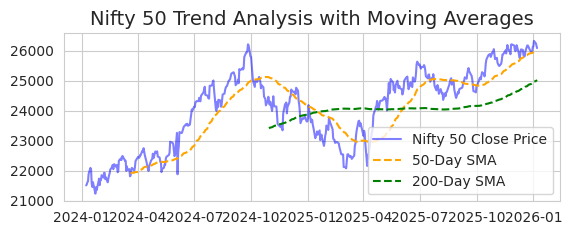

In [8]:
# Subplot 1: Price & Moving Averages
plt.subplot(2, 1, 1)
plt.plot(data['Close'], label='Nifty 50 Close Price', color='blue', alpha=0.5)
plt.plot(data['SMA_50'], label='50-Day SMA', color='orange', linestyle='--')
plt.plot(data['SMA_200'], label='200-Day SMA', color='green', linestyle='--')
plt.title('Nifty 50 Trend Analysis with Moving Averages', fontsize=14)
plt.legend()

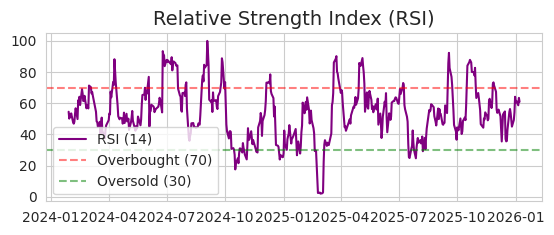

In [9]:
# Subplot 2: RSI Indicator
plt.subplot(2, 1, 2)
plt.plot(data['RSI'], label='RSI (14)', color='purple')
plt.axhline(70, color='red', linestyle='--', alpha=0.5, label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', alpha=0.5, label='Oversold (30)')
plt.title('Relative Strength Index (RSI)', fontsize=14)
plt.legend()

In [10]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [11]:
# Print the latest statistics
latest_price = data['Close'].iloc[-1].item()
latest_rsi = data['RSI'].iloc[-1]
avg_return = data['Daily_Return'].mean() * 100

print(f"\n--- Analysis Summary for {ticker} ---")
print(f"Latest Close Price: {latest_price:.2f}")
print(f"Current RSI: {latest_rsi:.2f}")
print(f"Average Daily Return: {avg_return:.4f}%")


--- Analysis Summary for ^NSEI ---
Latest Close Price: 26089.00
Current RSI: 60.97
Average Daily Return: 0.0424%


In [12]:
if latest_rsi > 70:
    print("Signal: Market is potentially Overbought.")
elif latest_rsi < 30:
    print("Signal: Market is potentially Oversold.")
else:
    print("Signal: Market is in Neutral Zone.")

Signal: Market is in Neutral Zone.
